In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\zwato\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 3ms/step - loss: 22974151580975104.0000 - val_loss: 14617883443200.0000
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 7723970199552.0000 - val_loss: 3417093963776.0000
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1805568049152.0000 - val_loss: 798785339392.0000
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 422071828480.0000 - val_loss: 186725318656.0000
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 98664218624.0000 - val_loss: 43649114112.0000
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 23063846912.0000 - val_loss: 10203475968.0000
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 5391437312.0000 - val_loss: 2385182720.0000
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 1260309632.0000 - val_loss: 557565056.0000
Epoch 9/20
363/363 [==================

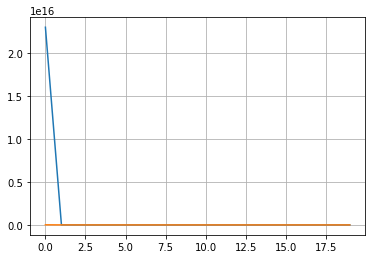

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [7]:
X_train_norm, y_train_norm = StandardScaler().fit_transform(X_train), y_train
X_valid_norm, y_valid_norm = StandardScaler().fit_transform(X_valid), y_valid
history_norm = model.fit(X_train_norm, y_train, epochs=20, validation_data=(X_valid_norm, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

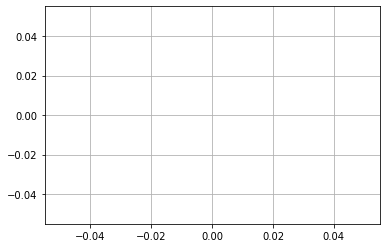

In [8]:
plt.plot(pd.DataFrame(history_norm.history))
plt.grid(True)
plt.show()

# Dane zawsze muszą być przeskalowane